# Create Figures

## $\theta_0$ & $\theta_{90}$ vs inclination

This figure attempts to obtain $\theta_0$ and $\theta_{90}$ as a function of inclination for quadrics section. I plan to do a reference in section 4.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from scipy.special import gamma as gamma_func
%matplotlib inline

Equations to solve:
\begin{align}
T(\theta_0) &= \cot\theta_c\cot i + \frac{x_0}{b}\sqrt{\cot^2\theta_c\cot^2 i \pm 1}\\
T(\theta_{90}) &= f_2(i;\theta_c)\left[\frac{x_0}{b} - \frac{x_0}{a}\frac{|\cot\theta_c|}{f^2(i;\theta_c)}\right] \\
\frac{x_0}{b} &= \frac{|\tan\theta_c|}{\tilde{R}_c} - \cot\theta_c\\
\frac{x_0}{a} &= \frac{\tan^2\theta_c}{\tilde{R}_c} \mp 1 \\
f(i;\theta_c) &= \left(1 \pm \tan^2 i\tan^2\theta_c\right)^{1/2}\\
f_2(i;\theta_c) &= \left[1 \mp \left(\frac{x_0}{a}\right)^2\frac{1}{f^4(i;\theta_c)}\right]^{-1/2}
\end{align}

In [3]:
def f(i, tc):
    """
    Function of inclination and theta_c
    """
    return np.sqrt(1 + np.sign(tc)*np.tan(np.radians(i))**2*np.tan(tc)**2)

In [4]:
def x0a(Rc, tantc):
    """
    x_0 over a ratio
    """
    return tantc**2/Rc -np.sign(tantc)

In [5]:
def x0b(Rc, tantc):
    """
    x_0 over b ratio
    """
    return np.abs(tantc)/Rc - 1./tantc

In [6]:
def f2(i, tc, Rc):
    """
    Function of inclination, theta_c and R_c
    """
    return np.sqrt(1 - np.sign(tc) + x0a(Rc, tc)**2/f(i, tc)**4)

Set parameters:

In [7]:
inclination = np.linspace(0,30)
beta = [1e-4, 1e-2, 1e-1]
xi = [1, 0.8, 0.4]

Set more functions for the tail fit:

In [8]:
def x0_tail(beta, xi):
    """
    Hyperbola offset for tail
    """
    ck0 = [2.0758, -0.2309, -0.2532]
    ck1 = [0.9571, -0.1530, -0.2487]
    ck2 = [0.2528, -0.0360, -0.0794]
    ck3 = [0.0171, -0.0010, -0.0095]
    if xi=="isotropic":
        C3 = 0.0051
        C2 = 0.1092
        C1 = 0.4229
        C0 = 1.3195
    else:
        C3 =  ck3[2]*xi**2 + ck3[1]*xi + ck3[0]
        C2 =  ck2[2]*xi**2 + ck2[1]*xi + ck2[0]
        C1 =  ck1[2]*xi**2 + ck1[1]*xi + ck1[0]
        C0 =  ck0[2]*xi**2 + ck0[1]*xi + ck0[0]
    logb = np.log10(beta)
    return 0.7*beta**(-0.55)*(C3*logb**3 + C2*logb**2 + C1*logb + C0)

In [9]:
def x0ma_tail(beta, xi):
    """
    Find x0 - a for the tail fit
    """
    dk0 = [0.8516, -0.0907, -0.2002]
    dk1 = [-0.7620, 0.1411, -0.0295]
    dk2 = [-0.0683, 0.0390, -0.0236]
    if xi == "isotropic":
        D2 = -0.0126
        D1 = -0.2363
        D0 = 0.7962
    else:
        D2 =  dk2[2]*xi**2 + dk2[1]*xi + dk2[0]
        D1 =  dk1[2]*xi**2 + dk1[1]*xi + dk1[0]
        D0 =  dk0[2]*xi**2 + dk0[1]*xi + dk0[0]
    logb = np.log10(beta)
    return D2*logb**2 + D1*logb + D0

## $\theta_\infty$ for non isotropic case

For the non isotropic case the inner wind mass loss truncates at $\theta = \frac{\pi}{2}$. So, the equation (54) of
paper does not apply for $\theta > \frac{\pi}{2}$ if $k > 0$. Instead, we got that the equivalent of equation (54) is:
\begin{align}
\theta_1\cot\theta_1 &= 2\beta I \cot\theta -\frac{2\beta}{k+2} \\
\mathrm{where~}  I &= \int^{\frac{\pi}{2}}_{0} \cos^k\theta\sin^2\theta~d\theta = \frac{\sqrt{\pi}\Gamma\left(\frac{k+1}{2}\right)}{4\Gamma\left(\frac{k}{2}+2\right)}
\end{align}

With this we can obtain $\theta_\infty$ defined as $\theta_\infty + \theta_{1\infty} = \pi$ solving the implicit equation for $\theta_\infty$:

$$\theta_\infty - \frac{k+2(1-\beta)}{k+2}\tan\theta_\infty = \pi + 2\beta I$$

In [10]:
def finf(th, beta, xi):
    k = 2./xi-2
    C = (k+2*(1-beta))/(k+2)
    I = np.sqrt(np.pi)*gamma_func(0.5*(k+1))/(4*gamma_func(0.5*k+2))
    D = np.pi + 2*beta*I
    return th - C*np.tan(th) -D

In [11]:
def finf_CRW(th, beta):
    return th - np.tan(th) - np.pi/(1.0 -beta)

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in add


0.0001 1 28.956212939286104
0.0001 0.8 36.41853809021104
0.0001 0.4 39.91315844481063
0.01 1 4.914225810531087
0.01 0.8 30.44971791046558
0.01 0.4 38.90338501934468
0.1 1 -49.95516793157587
0.1 0.8 -35.267429884540725
0.1 0.4 35.686372306831835


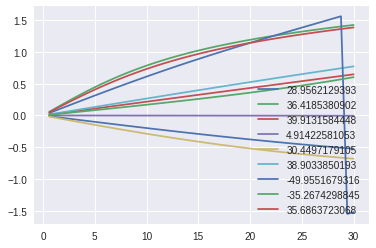

In [12]:
for b in beta:
    for x in xi:
        k = 2./x -2.
        Ak = 1./15 - (3*k)/20.
        Ckb = 0.5*(Ak-(b/15.))
        gamma = Ckb/(1+np.sqrt(b)) + (1 + 2*np.sqrt(b))/6.
        Rc = 1./np.abs(1.-2*gamma)
        R90 = (np.sqrt(3*x)*(1+np.sqrt(b)))/(np.sqrt(1+0.2**x*b)*(1-x*b))
        mod = 2*Rc-R90**2
        tantch = np.sign(mod)*np.sqrt(np.abs(mod))
        cotth0h = 1./(tantch*np.tan(np.radians(inclination))) + x0b(Rc, tantch)*np.sqrt(1./(tantch*np.tan(np.radians(inclination)))**2 + np.sign(tantch))
        th0h = np.arctan(1./cotth0h)
        plt.plot(inclination, th0h, label=np.degrees(np.arctan(tantch)))
        plt.legend()
        print(b, x, format(np.degrees(np.arctan(tantch))))

# Ionization front density jump

The density jump in a ionization front is given by:

\begin{equation}
    \frac{\rho_i}{\rho_0} = \frac{1}{2}\frac{c^2_0}{c^2_i}\left[\mathcal{M}^2 + 1 \pm \left(\left(\mathcal{M}^2 + 1\right)^2 -4\mathcal{M}^2\frac{c^2_i}{c^2_0}\right)^{1/2}\right]
\end{equation}
Where $\rho_x$ is the density of the "x" medium, $0$ for neutral medium ani $i$ for the ionized medium. $\mathcal{M}$ is the Mach number of the neutral medium and $c_x$ is the sound speed of the "x" medium

In [13]:
ci = 10
c0 = 2
cr = ci/c0

In [24]:
Mr = cr*(1 + np.sqrt(1 - 1./cr**2))
Md = cr*(1 - np.sqrt(1 - 1./cr**2))
Ms = np.logspace(-3, np.log10(Md), 100)
MS = np.logspace(np.log10(Mr), 3, 100)
sns.set_style("whitegrid")

In [25]:
def D(M):
    """
    Discriminant of jump density function
    """
    return np.sqrt((M**2+1)**2 - 4*(M*cr)**2)

In [26]:
Xdw = 0.5/cr**2*(Ms**2 + 1 - D(Ms))
Xds = 0.5/cr**2*(Ms**2 + 1 + D(Ms))
Xrw = 0.5/cr**2*(MS**2 + 1 - D(MS))
Xrs = 0.5/cr**2*(MS**2 + 1 + D(MS))

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


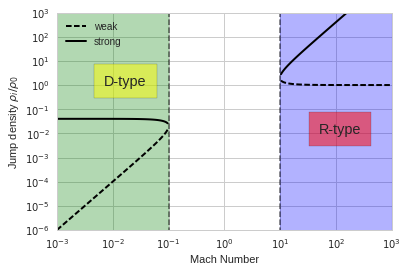

In [27]:
plt.plot(Ms, Xdw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Xds, lw=2, c="k", linestyle="-")
plt.plot(MS, Xrw, lw=2, c="k", linestyle="--")
plt.plot(MS, Xrs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-6, 1e3)
plt.text(0.007, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(50, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel(r"Jump density $\rho_i/\rho_0$")
plt.savefig("./Figures/IF-types.pdf")

## Velocity Jump

The jump velocity can be easiliy derived from continuity equation:
\begin{equation}
\mathcal{M}_i = \mathcal{M}\frac{c_0}{c_i}\frac{\rho_0}{\rho_i}
\end{equation}

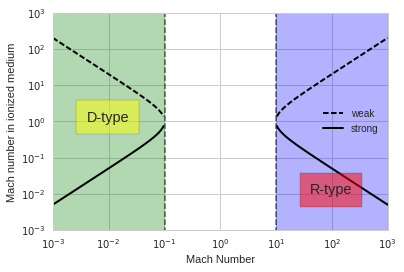

In [36]:
Midw = Ms/(cr*Xdw)
Mids = Ms/(cr*Xds)
Mirw = MS/(cr*Xrw)
Mirs = MS/(cr*Xrs)
plt.plot(Ms, Midw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Mids, lw=2, c="k", linestyle="-")
plt.plot(MS, Mirw, lw=2, c="k", linestyle="--")
plt.plot(MS, Mirs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-3, 1e3)
plt.text(0.004, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(40, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel("Mach number in ionized medium")
plt.savefig("./Figures/IF-vel-jump.pdf")